OpenCv provides three types of gradient filters or high-pass filters. Sobel, Scharr, and Laplacian. 

### Sobel and Scharr Derivatives

it is just a joint gaussian smoothing plus differentiation operation. it is more resistant to onise. you can specify the direction of the derivatives to be taken, vertical or horizontal. you can also specify the size of the kernel given by the argument ksize. if ksize = -1, scharr filter is used which gives better results than 3 x 3 sobel filter. 

## Laplacian derivatives. 

it calculates the laplacian of an image given by the relation as follows :- 
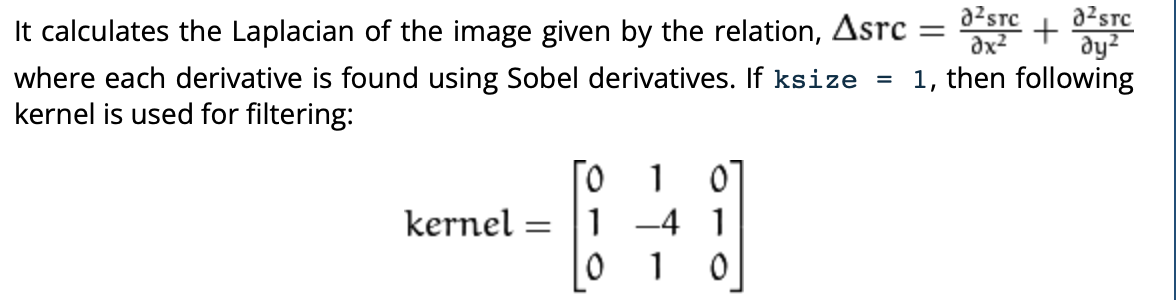

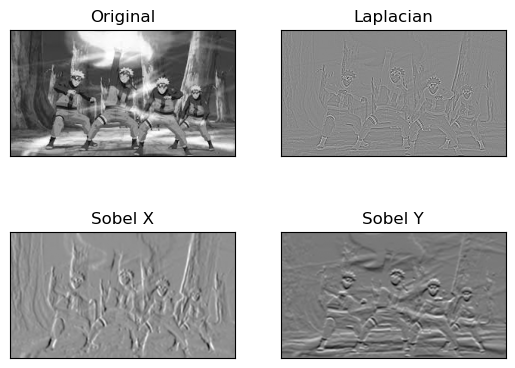

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./sample_imgs/rasenshuriken.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


here, the output data type is cv2.CV_8U or np.uint8. there is a slight problem with that. black to white transition is taken as positivbe slope while black to white transition is taken as negative slope. 

so, when you convert data to np.uint8, all negative slopes are made zero, so we miss that edge. 

if we want to detect both edges, better option is to keep the output data type to some higher forms like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert it back to cv2.CV_8U. 

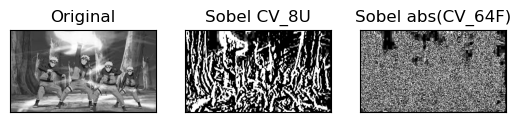

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./sample_imgs/rasenshuriken.jpeg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()